In [1]:
import os
import tarfile
import pickle
import platform
import numpy as np
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


# 加载训练数据
def load_cifar10_datasets(data_dir):
    # CIFAR-10 数据集包含 5 个训练批次和 1 个测试批次
    train_data = []
    train_labels = []

    # 加载每个训练批次
    for i in range(1, 6):  # data_batch_1 到 data_batch_5
        #batch = unpickle(f'{data_dir}/data_batch_{i}')
        with open(f'{data_dir}/data_batch_{i}', 'rb') as fo: 
            batch = pickle.load(fo, encoding='bytes') 
        train_data.append(batch[b'data'])
        train_labels.append(batch[b'labels'])

    # 合并数据
    x_train = np.vstack(train_data)  # 将所有批次的数据合并为一个大数组
    y_train = np.concatenate(train_labels)  # 合并所有批次的标签

    # 加载测试数据
    test_batch = unpickle(f'{data_dir}/test_batch')
    x_test = test_batch[b'data']
    y_test = np.array(test_batch[b'labels'])

    # 返回训练和测试数据及其标签
    return (x_train, y_train), (x_test, y_test)


def to_categorical(y, num_classes):
    """从keras中复制而来
    Converts a class vector (integers) to binary class matrix.

    E.g. for use with categorical_crossentropy.

    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.

    # Returns
        A binary matrix representation of the input. The classes axis
        is placed last.
    """
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype=np.float32)
    categorical[np.arange(n), y] = 1
    return categorical
train_set,  test_set = load_cifar10_datasets('cifar-10-python/cifar-10-batches-py/')
train_y,test_y=to_categorical(train_set[1],10),to_categorical(test_set[1],10)

# 随机选择训练样本
train_num = train_set[0].shape[0]
def next_batch(batch_size):
    idx=np.random.choice(train_num,batch_size)
    return train_set[0][idx],train_y[idx]

x,y= next_batch(16)
print("x.shape:{},y.shape:{}".format(x.shape,y.shape))

上面是加载数据用的。注意，每个方法运行时，先运行上面的函数。

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


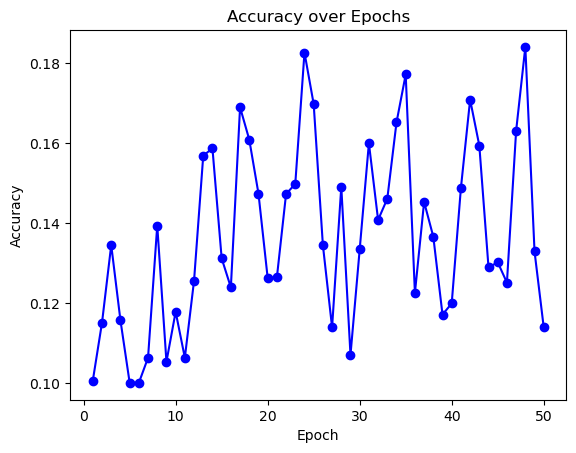

[{0: 0, 1: 0, 2: 0, 3: 0, 4: 6, 5: 0, 6: 0, 7: 0, 8: 1000, 9: 0}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 11, 5: 0, 6: 0, 7: 269, 8: 752, 9: 119}, {0: 964, 1: 0, 2: 0, 3: 0, 4: 381, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 573, 5: 584, 6: 0, 7: 0, 8: 0, 9: 0}, {0: 995, 1: 0, 2: 6, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1000}, {0: 0, 1: 92, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 971, 9: 0}, {0: 0, 1: 665, 2: 0, 3: 0, 4: 9, 5: 0, 6: 645, 7: 0, 8: 73, 9: 2}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 295, 5: 758, 6: 0, 7: 0, 8: 0, 9: 0}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 244, 5: 818, 6: 0, 7: 0, 8: 0, 9: 116}, {0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 972, 7: 90, 8: 0, 9: 0}, {0: 3, 1: 0, 2: 0, 3: 0, 4: 977, 5: 0, 6: 1, 7: 0, 8: 0, 9: 275}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 763, 5: 0, 6: 1, 7: 2, 8: 0, 9: 803}, {0: 0, 1: 0, 2: 0, 3: 639, 4: 49, 5: 0, 6: 0, 7: 6, 8: 335, 9: 558}, {0: 0, 1: 385, 2: 0, 3: 0, 4: 378, 5: 0, 6: 549, 7: 0, 8: 0, 9: 0}, {0: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
def mean_squared_error_loss(y_predict, y_true):
    """
    平方损失函数
    :param y_predict: 预测值, shape (N, d)，N为批量样本数
    :param y_true: 真实值, shape (N, d)
    :return: (loss, dy) - 损失值和梯度
    """
    # 计算损失
    loss = np.mean(np.sum((y_predict - y_true) ** 2, axis=-1))  # 损失函数

    # 计算梯度
    dy = 2 * (y_predict - y_true) / y_predict.shape[0]  # 梯度
    return loss, dy
def relu_backward(next_dz, z):
    """
    relu反向传播
    :param next_dz: 激活后的梯度
    :param z: 激活前的值
    :return:
    """
    dz = np.where(np.greater(z, 0), next_dz, 0)
    return dz

# 定义后向过程
def backward(X,y_true):
    loss,dy=mean_squared_error_loss(nuerons["y"],y_true)
    gradients["W3"],gradients["b3"],gradients["z3_relu"]=fc_backward(dy,weights["W3"],nuerons["z3_relu"])
    gradients["z3"]=relu_backward(gradients["z3_relu"],nuerons["z3"])
    gradients["W2"],gradients["b2"],gradients["z2_relu"]=fc_backward(gradients["z3"],
                                                                     weights["W2"],nuerons["z2_relu"])
    gradients["z2"]=relu_backward(gradients["z2_relu"],nuerons["z2"])
    gradients["W1"],gradients["b1"],_=fc_backward(gradients["z2"],
                                                    weights["W1"],X)
    return loss
# 定义权重、神经元、梯度
def relu_forward(z):
    
    """
    relu前向传播
    :param z: 待激活层
    :return: 激活后的结果
    """
    
    return np.maximum(0, z)
weights={}
weights_scale=1e-3
weights["W1"]=weights_scale*np.random.randn(3072,256)
weights["b1"]=np.zeros(256)
weights["W2"]=weights_scale*np.random.randn(256,256)
weights["b2"]=np.zeros(256)
weights["W3"]=weights_scale*np.random.randn(256,10)
weights["b3"]=np.zeros(10)
accuracy_for_class = []
nuerons={}
gradients={}
# 定义前向过程
def forward(X):
    nuerons["z2"]=fc_forward(X,weights["W1"],weights["b1"])
    nuerons["z2_relu"]=relu_forward(nuerons["z2"])
    nuerons["z3"]=fc_forward(nuerons["z2_relu"],weights["W2"],weights["b2"])
    nuerons["z3_relu"]=relu_forward(nuerons["z3"])
    nuerons["y"]=fc_forward(nuerons["z3_relu"],weights["W3"],weights["b3"])
    return nuerons["y"]
def fc_backward(next_dz, W, z):
    
    """
    全连接层的反向传播
    :param next_dz: 下一层的梯度
    :param W: 当前层的权重
    :param z: 当前层的输出
    :return:
    """
    
    N = z.shape[0]
    dz = np.dot(next_dz, W.T)  # 当前层的梯度
    dw = np.dot(z.T, next_dz)  # 当前层权重的梯度
    db = np.sum(next_dz, axis=0)  # 当前层偏置的梯度, N个样本的梯度求和
    return dw / N, db / N, dz
def fc_forward(z, W, b):
    
    """
    全连接层的前向传播
    :param z: 当前层的输出,形状 (N,ln)
    :param W: 当前层的权重
    :param b: 当前层的偏置
    :return: 下一层的输出
    """
    
    return np.dot(z, W) + b
# 初始化变量
Losslist = []
batch_size=1
epoch = 50
steps = 100
lr = 0.001
loss = 0
losssum = 0
accuracy_list = []
for e in range(epoch):
    for s in range(steps):
        X,y=next_batch(batch_size)
        
        # 前向过程
        forward(X)
        loss=backward(X,y)
        losssum+=loss
        # 更新梯度
        for k in ["W1","b1","W2","b2","W3","b3"]:
            weights[k]-=lr*gradients[k]
    Losslist.append(losssum/steps)
    losssum=0
    count = 0
    accuracy = {i: 0 for i in range(10)}
    for i in range(10000):
        x, y = test_set[0][i], test_y[i]
        y_predict = np.argmax(forward([x])[0])
        if np.argmax(y) ==  y_predict:
            count+=1
            if np.argmax(y) in accuracy:
                accuracy[np.argmax(y)] += 1
    accuracy_for_class.append(accuracy)
    accuracy_list.append(count/10000)
    print("epoch",e)
# 横坐标是索引 + 1 (即epoch数)
epochs = list(range(1, len(accuracy_list) + 1))

# 绘制图表
plt.plot(epochs, accuracy_list, marker='o', linestyle='-', color='b')

# 添加标题和标签
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 显示图表
plt.show()
print(accuracy_for_class)
print(Losslist)

SGD，MSE，多层MLP input(3072)=> fc (256) => relu => fc(256) => relu => fc(10)

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


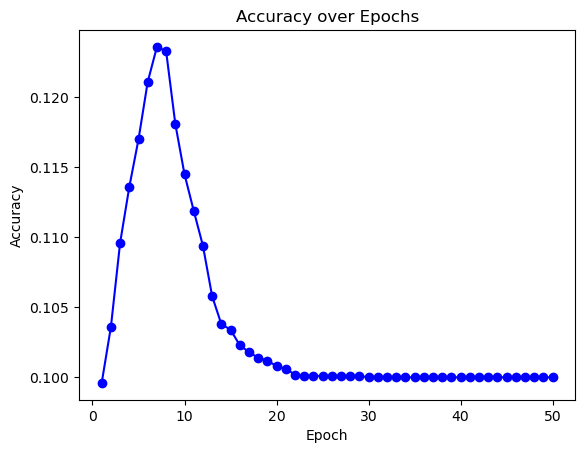

[{0: 0, 1: 0, 2: 0, 3: 0, 4: 80, 5: 610, 6: 0, 7: 0, 8: 172, 9: 134}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 84, 5: 563, 6: 0, 7: 0, 8: 252, 9: 137}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 84, 5: 511, 6: 0, 7: 0, 8: 359, 9: 142}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 90, 5: 455, 6: 0, 7: 0, 8: 454, 9: 137}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 99, 5: 391, 6: 0, 7: 0, 8: 551, 9: 129}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 98, 5: 331, 6: 0, 7: 0, 8: 655, 9: 127}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 103, 5: 266, 6: 0, 7: 0, 8: 753, 9: 114}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 95, 5: 219, 6: 0, 7: 0, 8: 825, 9: 94}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 82, 5: 146, 6: 0, 7: 0, 8: 874, 9: 79}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 74, 5: 96, 6: 0, 7: 0, 8: 911, 9: 64}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 63, 5: 71, 6: 0, 7: 0, 8: 935, 9: 50}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 55, 5: 47, 6: 0, 7: 0, 8: 956, 9: 36}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 48, 5: 22, 6: 0, 7: 0, 8: 962, 9: 26}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 35, 5: 14, 6: 0, 7: 0, 8: 971, 9: 18}, {0: 0, 1: 0, 2: 0, 3: 0, 4: 32, 5: 8, 6: 0, 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
def mean_squared_error_loss(y_predict, y_true):
    """
    平方损失函数
    :param y_predict: 预测值, shape (N, d)，N为批量样本数
    :param y_true: 真实值, shape (N, d)
    :return: (loss, dy) - 损失值和梯度
    """
    # 计算损失
    loss = np.mean(np.sum((y_predict - y_true) ** 2, axis=-1))  # 损失函数

    # 计算梯度
    dy = 2 * (y_predict - y_true) / y_predict.shape[0]  # 梯度
    return loss, dy
def relu_backward(next_dz, z):
    """
    relu反向传播
    :param next_dz: 激活后的梯度
    :param z: 激活前的值
    :return:
    """
    dz = np.where(np.greater(z, 0), next_dz, 0)
    return dz

# 定义后向过程
def backward(X,y_true):
    loss,dy=mean_squared_error_loss(nuerons["y"],y_true)
    gradients["W3"],gradients["b3"],gradients["z3_relu"]=fc_backward(dy,weights["W3"],nuerons["z3_relu"])
    gradients["z3"]=relu_backward(gradients["z3_relu"],nuerons["z3"])
    gradients["W2"],gradients["b2"],gradients["z2_relu"]=fc_backward(gradients["z3"],
                                                                     weights["W2"],nuerons["z2_relu"])
    gradients["z2"]=relu_backward(gradients["z2_relu"],nuerons["z2"])
    gradients["W1"],gradients["b1"],_=fc_backward(gradients["z2"],
                                                    weights["W1"],X)
    return loss
# 定义权重、神经元、梯度
def relu_forward(z):
    
    """
    relu前向传播
    :param z: 待激活层
    :return: 激活后的结果
    """
    
    return np.maximum(0, z)
weights={}
weights_scale=1e-3
weights["W1"]=weights_scale*np.random.randn(3072,256)
weights["b1"]=np.zeros(256)
weights["W2"]=weights_scale*np.random.randn(256,256)
weights["b2"]=np.zeros(256)
weights["W3"]=weights_scale*np.random.randn(256,10)
weights["b3"]=np.zeros(10)
accuracy_for_class = []
nuerons={}
gradients={}
# 定义前向过程
def forward(X):
    nuerons["z2"]=fc_forward(X,weights["W1"],weights["b1"])
    nuerons["z2_relu"]=relu_forward(nuerons["z2"])
    nuerons["z3"]=fc_forward(nuerons["z2_relu"],weights["W2"],weights["b2"])
    nuerons["z3_relu"]=relu_forward(nuerons["z3"])
    nuerons["y"]=fc_forward(nuerons["z3_relu"],weights["W3"],weights["b3"])
    return nuerons["y"]
def fc_backward(next_dz, W, z):
    
    """
    全连接层的反向传播
    :param next_dz: 下一层的梯度
    :param W: 当前层的权重
    :param z: 当前层的输出
    :return:
    """
    
    N = z.shape[0]
    dz = np.dot(next_dz, W.T)  # 当前层的梯度
    dw = np.dot(z.T, next_dz)  # 当前层权重的梯度
    db = np.sum(next_dz, axis=0)  # 当前层偏置的梯度, N个样本的梯度求和
    return dw / N, db / N, dz
def fc_forward(z, W, b):
    
    """
    全连接层的前向传播
    :param z: 当前层的输出,形状 (N,ln)
    :param W: 当前层的权重
    :param b: 当前层的偏置
    :return: 下一层的输出
    """
    
    return np.dot(z, W) + b
# 初始化变量
Losslist = []
batch_size=32
epoch = 50
steps = 2
lr = 10
loss = 0
losssum = 0
accuracy_list = []
for e in range(epoch):
    for s in range(steps): 
        X=train_set[0]
        # 前向过程
        forward(X)
        loss=backward(X,train_y)
        losssum+=loss
        # 更新梯度
        for k in ["W1","b1","W2","b2","W3","b3"]:
            weights[k]-=lr*gradients[k]
    
    Losslist.append(losssum/steps)
    losssum=0
    count = 0
    accuracy = {i: 0 for i in range(10)}
    for i in range(10000):
        x, y = test_set[0][i], test_y[i]
        y_predict = np.argmax(forward([x])[0])
        if np.argmax(y) ==  y_predict:
            count+=1
            if np.argmax(y) in accuracy:
                accuracy[np.argmax(y)] += 1
    accuracy_for_class.append(accuracy)
    accuracy_list.append(count/10000)
    print("epoch",e)
# 横坐标是索引 + 1 (即epoch数)
epochs = list(range(1, len(accuracy_list) + 1))

# 绘制图表
plt.plot(epochs, accuracy_list, marker='o', linestyle='-', color='b')

# 添加标题和标签
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 显示图表
plt.show()
print(accuracy_for_class)
print(Losslist)

batch GD，MSE，多层神经网络 input(3072)=> fc (256) => relu => fc(256) => relu => fc(10)

## 三、训练

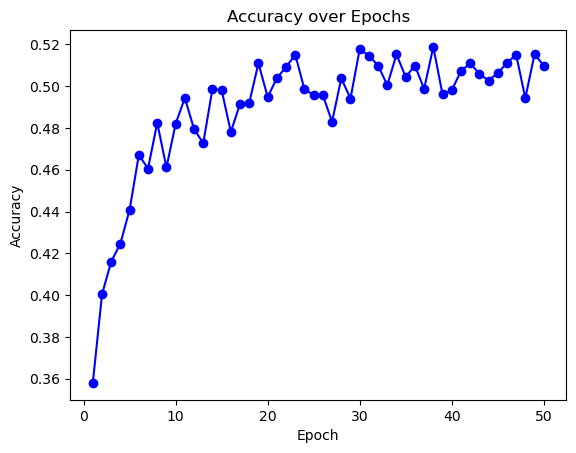

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
def mean_squared_error_loss(y_predict, y_true):
    """
    平方损失函数
    :param y_predict: 预测值, shape (N, d)，N为批量样本数
    :param y_true: 真实值, shape (N, d)
    :return: (loss, dy) - 损失值和梯度
    """
    # 计算损失
    loss = np.mean(np.sum((y_predict - y_true) ** 2, axis=-1))  # 损失函数

    # 计算梯度
    dy = 2 * (y_predict - y_true) / y_predict.shape[0]  # 梯度
    return loss, dy
def relu_backward(next_dz, z):
    """
    relu反向传播
    :param next_dz: 激活后的梯度
    :param z: 激活前的值
    :return:
    """
    dz = np.where(np.greater(z, 0), next_dz, 0)
    return dz

# 定义后向过程
def backward(X,y_true):
    loss,dy=mean_squared_error_loss(nuerons["y"],y_true)
    gradients["W3"],gradients["b3"],gradients["z3_relu"]=fc_backward(dy,weights["W3"],nuerons["z3_relu"])
    gradients["z3"]=relu_backward(gradients["z3_relu"],nuerons["z3"])
    gradients["W2"],gradients["b2"],gradients["z2_relu"]=fc_backward(gradients["z3"],
                                                                     weights["W2"],nuerons["z2_relu"])
    gradients["z2"]=relu_backward(gradients["z2_relu"],nuerons["z2"])
    gradients["W1"],gradients["b1"],_=fc_backward(gradients["z2"],
                                                    weights["W1"],X)
    return loss
# 定义权重、神经元、梯度
def relu_forward(z):
    
    """
    relu前向传播
    :param z: 待激活层
    :return: 激活后的结果
    """
    
    return np.maximum(0, z)
weights={}
weights_scale=1e-3
weights["W1"]=weights_scale*np.random.randn(3072,256)
weights["b1"]=np.zeros(256)
weights["W2"]=weights_scale*np.random.randn(256,256)
weights["b2"]=np.zeros(256)
weights["W3"]=weights_scale*np.random.randn(256,10)
weights["b3"]=np.zeros(10)
accuracy_for_class = []
nuerons={}
gradients={}
# 定义前向过程
def forward(X):
    nuerons["z2"]=fc_forward(X,weights["W1"],weights["b1"])
    nuerons["z2_relu"]=relu_forward(nuerons["z2"])
    nuerons["z3"]=fc_forward(nuerons["z2_relu"],weights["W2"],weights["b2"])
    nuerons["z3_relu"]=relu_forward(nuerons["z3"])
    nuerons["y"]=fc_forward(nuerons["z3_relu"],weights["W3"],weights["b3"])
    return nuerons["y"]
def fc_backward(next_dz, W, z):
    
    """
    全连接层的反向传播
    :param next_dz: 下一层的梯度
    :param W: 当前层的权重
    :param z: 当前层的输出
    :return:
    """
    
    N = z.shape[0]
    dz = np.dot(next_dz, W.T)  # 当前层的梯度
    dw = np.dot(z.T, next_dz)  # 当前层权重的梯度
    db = np.sum(next_dz, axis=0)  # 当前层偏置的梯度, N个样本的梯度求和
    return dw / N, db / N, dz
def fc_forward(z, W, b):
    
    """
    全连接层的前向传播
    :param z: 当前层的输出,形状 (N,ln)
    :param W: 当前层的权重
    :param b: 当前层的偏置
    :return: 下一层的输出
    """
    
    return np.dot(z, W) + b
# 初始化变量
Losslist = []
batch_size=32
epoch = 50
steps = train_num // batch_size
lr = 0.1
loss = 0
losssum = 0
accuracy_list = []
for e in range(epoch):
    for s in range(steps):
        X,y=next_batch(batch_size)
        
        # 前向过程
        forward(X)
        loss=backward(X,y)
        losssum+=loss
        # 更新梯度
        for k in ["W1","b1","W2","b2","W3","b3"]:
            weights[k]-=lr*gradients[k]
        if s%100 == 0:
            print("step",s)
    
    Losslist.append(losssum/steps)
    losssum=0
    count = 0
    accuracy = {i: 0 for i in range(10)}
    for i in range(10000):
        x, y = test_set[0][i], test_y[i]
        y_predict = np.argmax(forward([x])[0])
        if np.argmax(y) ==  y_predict:
            count+=1
            if np.argmax(y) in accuracy:
                accuracy[np.argmax(y)] += 1
    accuracy_for_class.append(accuracy)
    accuracy_list.append(count/10000)
    print("epoch",e)
# 横坐标是索引 + 1 (即epoch数)
epochs = list(range(1, len(accuracy_list) + 1))

# 绘制图表
plt.plot(epochs, accuracy_list, marker='o', linestyle='-', color='b')

# 添加标题和标签
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 显示图表
plt.show()

重要，这个是效果最好的，MSE＋ input(3072)=> fc (256) => relu => fc(256) => relu => fc(10)

In [5]:
print(accuracy_for_class)
print(Losslist)

[{0: 384, 1: 319, 2: 87, 3: 309, 4: 215, 5: 390, 6: 622, 7: 233, 8: 376, 9: 645}, {0: 488, 1: 620, 2: 187, 3: 262, 4: 501, 5: 342, 6: 344, 7: 356, 8: 428, 9: 476}, {0: 586, 1: 340, 2: 299, 3: 134, 4: 236, 5: 170, 6: 631, 7: 565, 8: 572, 9: 628}, {0: 529, 1: 561, 2: 275, 3: 217, 4: 176, 5: 358, 6: 609, 7: 376, 8: 788, 9: 358}, {0: 453, 1: 563, 2: 475, 3: 307, 4: 203, 5: 159, 6: 620, 7: 370, 8: 717, 9: 542}, {0: 477, 1: 715, 2: 353, 3: 379, 4: 370, 5: 314, 6: 422, 7: 489, 8: 586, 9: 566}, {0: 524, 1: 649, 2: 223, 3: 217, 4: 442, 5: 405, 6: 534, 7: 420, 8: 492, 9: 700}, {0: 628, 1: 621, 2: 488, 3: 171, 4: 343, 5: 445, 6: 522, 7: 472, 8: 584, 9: 551}, {0: 558, 1: 680, 2: 313, 3: 457, 4: 378, 5: 358, 6: 344, 7: 511, 8: 452, 9: 560}, {0: 455, 1: 595, 2: 359, 3: 181, 4: 396, 5: 372, 6: 634, 7: 549, 8: 749, 9: 530}, {0: 584, 1: 543, 2: 371, 3: 302, 4: 269, 5: 247, 6: 779, 7: 614, 8: 657, 9: 578}, {0: 516, 1: 546, 2: 183, 3: 193, 4: 542, 5: 333, 6: 601, 7: 633, 8: 711, 9: 537}, {0: 519, 1: 507,

Epoch [1/11], Loss: 23.8467, Test Accuracy: 14.49%
Epoch [2/11], Loss: 0.2971, Test Accuracy: 18.38%
Epoch [3/11], Loss: 0.1985, Test Accuracy: 19.05%
Epoch [4/11], Loss: 0.1449, Test Accuracy: 19.47%
Epoch [5/11], Loss: 0.1185, Test Accuracy: 21.77%
Epoch [6/11], Loss: 0.0996, Test Accuracy: 24.77%
Epoch [7/11], Loss: 0.0929, Test Accuracy: 30.32%
Epoch [8/11], Loss: 0.0858, Test Accuracy: 28.36%
Epoch [9/11], Loss: 0.0840, Test Accuracy: 31.44%
Epoch [10/11], Loss: 0.0849, Test Accuracy: 25.96%
Epoch [11/11], Loss: 0.5400, Test Accuracy: 9.99%


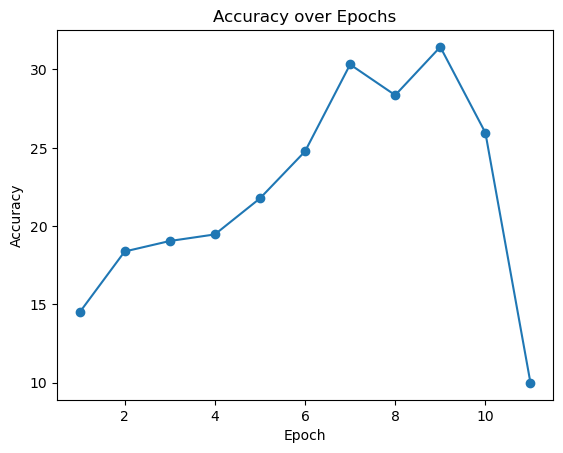

[{0: 14, 1: 110, 2: 214, 3: 233, 4: 167, 5: 39, 6: 136, 7: 327, 8: 60, 9: 149}, {0: 49, 1: 117, 2: 29, 3: 3, 4: 26, 5: 296, 6: 303, 7: 402, 8: 596, 9: 17}, {0: 33, 1: 251, 2: 32, 3: 32, 4: 340, 5: 107, 6: 262, 7: 55, 8: 117, 9: 676}, {0: 26, 1: 31, 2: 357, 3: 2, 4: 47, 5: 597, 6: 14, 7: 192, 8: 632, 9: 49}, {0: 151, 1: 79, 2: 72, 3: 3, 4: 128, 5: 818, 6: 67, 7: 255, 8: 387, 9: 217}, {0: 13, 1: 297, 2: 13, 3: 171, 4: 126, 5: 270, 6: 216, 7: 424, 8: 895, 9: 52}, {0: 81, 1: 195, 2: 60, 3: 25, 4: 358, 5: 513, 6: 454, 7: 173, 8: 743, 9: 430}, {0: 393, 1: 581, 2: 94, 3: 743, 4: 48, 5: 22, 6: 226, 7: 360, 8: 148, 9: 221}, {0: 707, 1: 512, 2: 275, 3: 333, 4: 164, 5: 2, 6: 225, 7: 584, 8: 78, 9: 264}, {0: 165, 1: 187, 2: 457, 3: 184, 4: 1, 5: 202, 6: 28, 7: 657, 8: 131, 9: 584}, {0: 0, 1: 0, 2: 0, 3: 998, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}]


In [4]:

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
import os
import tarfile
import pickle
import platform
import numpy as np
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict



def next_batch(batch_size):
    idx=np.random.choice(train_num,batch_size)
    return train_set[0][idx],train_y[idx]



def cross_entropy_loss(y_predict, y_true):
    """
    交叉熵损失函数
    :param y_predict: 预测值,shape (N,d)，N为批量样本数
    :param y_true: 真实值,shape(N,d)
    :return:
    """

    y_shift = y_predict - np.max(y_predict, axis=-1, keepdims=True)
    y_exp = np.exp(y_shift)
    y_probability = y_exp / np.sum(y_exp, axis=-1,keepdims=True)
    loss = np.mean(np.sum(-y_true * np.log(y_probability), axis=-1))  # 损失函数
    dy = y_probability - y_true
    return loss, dy



def relu_backward(next_dz, z):
    """
    relu反向传播
    :param next_dz: 激活后的梯度
    :param z: 激活前的值
    :return:
    """
    dz = np.where(np.greater(z, 0), next_dz, 0)
    return dz


# 定义后向过程
def backward(X, y_true):
    loss, dy = cross_entropy_loss(nuerons["y"], y_true)
    gradients["W3"], gradients["b3"], gradients["z3_relu"] = fc_backward(dy, weights["W3"], nuerons["z3_relu"])
    gradients["z3"] = relu_backward(gradients["z3_relu"], nuerons["z3"])
    gradients["W2"], gradients["b2"], gradients["z2_relu"] = fc_backward(gradients["z3"],
                                                                         weights["W2"], nuerons["z2_relu"])
    gradients["z2"] = relu_backward(gradients["z2_relu"], nuerons["z2"])
    gradients["W1"], gradients["b1"], _ = fc_backward(gradients["z2"],
                                                      weights["W1"], X)
    return loss


# 定义权重、神经元、梯度
def relu_forward(z):
    """
    relu前向传播
    :param z: 待激活层
    :return: 激活后的结果
    """

    return np.maximum(0, z)


weights = {}
weights_scale = 1e-3
weights["W1"] = weights_scale * np.random.randn(3072, 256)
weights["b1"] = np.zeros(256)
weights["W2"] = weights_scale * np.random.randn(256, 256)
weights["b2"] = np.zeros(256)
weights["W3"] = weights_scale * np.random.randn(256, 10)
weights["b3"] = np.zeros(10)
accuracy_for_class = []
nuerons = {}
gradients = {}


# 定义前向过程
def forward(X):
    nuerons["z2"] = fc_forward(X, weights["W1"], weights["b1"])
    nuerons["z2_relu"] = relu_forward(nuerons["z2"])
    nuerons["z3"] = fc_forward(nuerons["z2_relu"], weights["W2"], weights["b2"])
    nuerons["z3_relu"] = relu_forward(nuerons["z3"])
    nuerons["y"] = fc_forward(nuerons["z3_relu"], weights["W3"], weights["b3"])
    return nuerons["y"]


def fc_backward(next_dz, W, z):
    """
    全连接层的反向传播
    :param next_dz: 下一层的梯度
    :param W: 当前层的权重
    :param z: 当前层的输出
    :return:
    """

    N = z.shape[0]
    dz = np.dot(next_dz, W.T)  # 当前层的梯度
    dw = np.dot(z.T, next_dz)  # 当前层权重的梯度
    db = np.sum(next_dz, axis=0)  # 当前层偏置的梯度, N个样本的梯度求和
    return dw / N, db / N, dz


def fc_forward(z, W, b):
    """
    全连接层的前向传播
    :param z: 当前层的输出,形状 (N,ln)
    :param W: 当前层的权重
    :param b: 当前层的偏置
    :return: 下一层的输出
    """

    return np.dot(z, W) + b

# 初始化变量
Losslist = []
batch_size = 32
epoch = 10
steps = train_num // batch_size
lr = 0.1
loss = 0
losssum = 0
accuracy_list = []
# 定义Adam相关的参数
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8


# 初始化一阶动量和二阶动量
m = {k: np.zeros_like(weights[k]) for k in weights}
v = {k: np.zeros_like(weights[k]) for k in weights}
t = 0  # 时间步数


def adam_update(weights, gradients, t, lr, beta1, beta2, epsilon):
    for k in weights.keys():
        # 更新一阶和二阶动量
        m[k] = beta1 * m[k] + (1 - beta1) * gradients[k]
        v[k] = beta2 * v[k] + (1 - beta2) * (gradients[k] ** 2)

        # 计算偏差修正后的动量
        m_hat = m[k] / (1 - beta1 ** t)
        v_hat = v[k] / (1 - beta2 ** t)

        # 更新权重
        weights[k] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)


for e in range(epoch):
    for s in range(steps):
        X, y = next_batch(batch_size)

        # 前向过程
        forward(X)
        loss = backward(X, y)
        losssum += loss

        # 更新梯度（使用 Adam）
        t += 1
        adam_update(weights, gradients, t, lr, beta1, beta2, epsilon)

        if s % 100 == 0:
            print("step", s)

    Losslist.append(losssum / steps)
    losssum = 0
    count = 0
    accuracy = {i: 0 for i in range(10)}

    for i in range(10000):
        x, y = test_set[0][i], test_y[i]
        y_predict = np.argmax(forward([x])[0])
        if np.argmax(y) == y_predict:
            count += 1
            if np.argmax(y) in accuracy:
                accuracy[np.argmax(y)] += 1

    accuracy_for_class.append(accuracy)
    accuracy_list.append(count / 10000)
    print("epoch", e)
# 横坐标是索引 + 1 (即epoch数)
epochs = list(range(1, len(accuracy_list) + 1))

# 绘制图表
plt.plot(epochs, accuracy_list, marker='o', linestyle='-', color='b')

# 添加标题和标签
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 显示图表
plt.show()







Adam+交叉熵

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


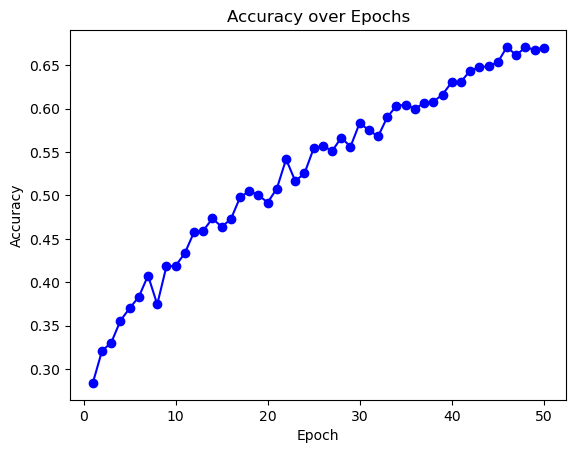

[{0: 190, 1: 427, 2: 214, 3: 14, 4: 168, 5: 243, 6: 500, 7: 384, 8: 428, 9: 273}, {0: 119, 1: 560, 2: 322, 3: 398, 4: 90, 5: 214, 6: 321, 7: 371, 8: 431, 9: 385}, {0: 275, 1: 596, 2: 260, 3: 169, 4: 383, 5: 262, 6: 169, 7: 331, 8: 603, 9: 256}, {0: 226, 1: 350, 2: 468, 3: 149, 4: 231, 5: 247, 6: 358, 7: 274, 8: 639, 9: 616}, {0: 138, 1: 421, 2: 63, 3: 360, 4: 230, 5: 268, 6: 600, 7: 450, 8: 612, 9: 559}, {0: 186, 1: 586, 2: 325, 3: 490, 4: 232, 5: 180, 6: 413, 7: 407, 8: 519, 9: 494}, {0: 286, 1: 608, 2: 380, 3: 385, 4: 292, 5: 265, 6: 478, 7: 391, 8: 550, 9: 442}, {0: 216, 1: 455, 2: 292, 3: 240, 4: 427, 5: 388, 6: 213, 7: 560, 8: 205, 9: 749}, {0: 337, 1: 553, 2: 272, 3: 231, 4: 449, 5: 287, 6: 349, 7: 483, 8: 754, 9: 469}, {0: 262, 1: 406, 2: 611, 3: 226, 4: 207, 5: 373, 6: 415, 7: 338, 8: 719, 9: 632}, {0: 245, 1: 664, 2: 474, 3: 269, 4: 375, 5: 394, 6: 440, 7: 379, 8: 560, 9: 535}, {0: 403, 1: 622, 2: 252, 3: 212, 4: 391, 5: 436, 6: 470, 7: 592, 8: 556, 9: 643}, {0: 465, 1: 713, 2

In [17]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
def mean_squared_error_loss(y_predict, y_true):
    """
    平方损失函数
    :param y_predict: 预测值, shape (N, d)，N为批量样本数
    :param y_true: 真实值, shape (N, d)
    :return: (loss, dy) - 损失值和梯度
    """
    # 计算损失
    loss = np.mean(np.sum((y_predict - y_true) ** 2, axis=-1))  # 损失函数

    # 计算梯度
    dy = 2 * (y_predict - y_true) / y_predict.shape[0]  # 梯度
    return loss, dy
def relu_backward(next_dz, z):
    """
    relu反向传播
    :param next_dz: 激活后的梯度
    :param z: 激活前的值
    :return:
    """
    dz = np.where(np.greater(z, 0), next_dz, 0)
    return dz

# 定义后向过程
def backward(X,y_true):
    loss,dy=mean_squared_error_loss(nuerons["y"],y_true)
    gradients["W3"],gradients["b3"],gradients["z3_relu"]=fc_backward(dy,weights["W3"],nuerons["z3_relu"])
    gradients["z3"]=relu_backward(gradients["z3_relu"],nuerons["z3"])
    gradients["W2"],gradients["b2"],gradients["z2_relu"]=fc_backward(gradients["z3"],
                                                                     weights["W2"],nuerons["z2_relu"])
    gradients["z2"]=relu_backward(gradients["z2_relu"],nuerons["z2"])
    gradients["W1"],gradients["b1"],_=fc_backward(gradients["z2"],
                                                    weights["W1"],X)
    return loss
# 定义权重、神经元、梯度
def relu_forward(z):
    
    """
    relu前向传播
    :param z: 待激活层
    :return: 激活后的结果
    """
    
    return np.maximum(0, z)
weights={}
weights_scale=1e-3
weights["W1"]=weights_scale*np.random.randn(1024,512)
weights["b1"]=np.zeros(512)
weights["W2"]=weights_scale*np.random.randn(512,256)
weights["b2"]=np.zeros(256)
weights["W3"]=weights_scale*np.random.randn(256,10)
weights["b3"]=np.zeros(10)
accuracy_for_class = []
nuerons={}
gradients={}
# 定义前向过程
def forward(X):
    nuerons["z2"]=fc_forward(X,weights["W1"],weights["b1"])
    nuerons["z2_relu"]=relu_forward(nuerons["z2"])
    nuerons["z3"]=fc_forward(nuerons["z2_relu"],weights["W2"],weights["b2"])
    nuerons["z3_relu"]=relu_forward(nuerons["z3"])
    nuerons["y"]=fc_forward(nuerons["z3_relu"],weights["W3"],weights["b3"])
    return nuerons["y"]
def fc_backward(next_dz, W, z):
    
    """
    全连接层的反向传播
    :param next_dz: 下一层的梯度
    :param W: 当前层的权重
    :param z: 当前层的输出
    :return:
    """
    
    N = z.shape[0]
    dz = np.dot(next_dz, W.T)  # 当前层的梯度
    dw = np.dot(z.T, next_dz)  # 当前层权重的梯度
    db = np.sum(next_dz, axis=0)  # 当前层偏置的梯度, N个样本的梯度求和
    return dw / N, db / N, dz
def fc_forward(z, W, b):
    
    """
    全连接层的前向传播
    :param z: 当前层的输出,形状 (N,ln)
    :param W: 当前层的权重
    :param b: 当前层的偏置
    :return: 下一层的输出
    """
    
    return np.dot(z, W) + b
# 初始化变量
Losslist = []
batch_size=32
epoch = 50
steps = train_num // batch_size
lr = 0.1
loss = 0
losssum = 0
accuracy_list = []
for e in range(epoch):
    for s in range(steps):
        X,y=next_batch(batch_size)
        split_data = np.split(X, 3, axis=1)

        # split_data 是一个包含三个数组的列表，每个数组的形状为 (50000, 1024)
        part1, part2, part3 = split_data
        
        # 前向过程
        forward(part1)
        loss=backward(part1,y)
        losssum+=loss
        # 更新梯度
        for k in ["W1","b1","W2","b2","W3","b3"]:
            weights[k]-=lr*gradients[k]
    
    Losslist.append(losssum/steps)
    losssum=0
    count = 0
    accuracy = {i: 0 for i in range(10)}
    for i in range(10000):
        x, y = train_set[0][i], train_y[i]
        x = x[:1024]
        y_predict = np.argmax(forward([x])[0])
        if np.argmax(y) ==  y_predict:
            count+=1
            if np.argmax(y) in accuracy:
                accuracy[np.argmax(y)] += 1
    accuracy_for_class.append(accuracy)
    accuracy_list.append(count/10000)
    print("epoch",e)
# 横坐标是索引 + 1 (即epoch数)
epochs = list(range(1, len(accuracy_list) + 1))

# 绘制图表
plt.plot(epochs, accuracy_list, marker='o', linestyle='-', color='b')

# 添加标题和标签
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 显示图表
plt.show()
print(accuracy_for_class)
print(Losslist)

自创模型，学习机1

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


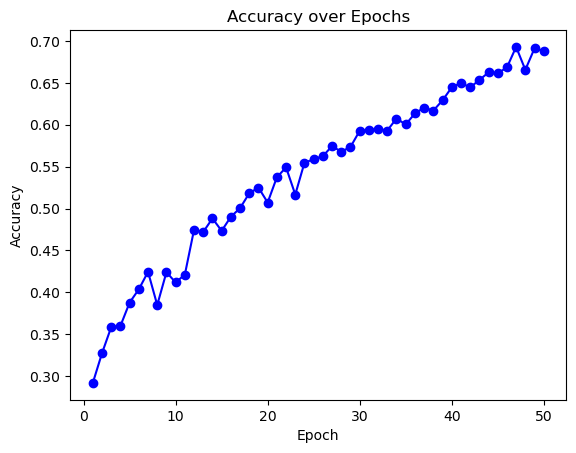

[{0: 384, 1: 346, 2: 311, 3: 31, 4: 176, 5: 276, 6: 298, 7: 514, 8: 250, 9: 334}, {0: 71, 1: 505, 2: 235, 3: 370, 4: 190, 5: 277, 6: 445, 7: 306, 8: 333, 9: 543}, {0: 375, 1: 548, 2: 355, 3: 140, 4: 412, 5: 304, 6: 207, 7: 365, 8: 512, 9: 368}, {0: 178, 1: 386, 2: 458, 3: 124, 4: 237, 5: 319, 6: 305, 7: 280, 8: 685, 9: 628}, {0: 207, 1: 513, 2: 97, 3: 218, 4: 246, 5: 298, 6: 640, 7: 489, 8: 594, 9: 577}, {0: 266, 1: 521, 2: 484, 3: 460, 4: 236, 5: 182, 6: 390, 7: 423, 8: 447, 9: 628}, {0: 528, 1: 567, 2: 322, 3: 349, 4: 266, 5: 252, 6: 527, 7: 404, 8: 497, 9: 533}, {0: 151, 1: 422, 2: 328, 3: 201, 4: 376, 5: 387, 6: 340, 7: 651, 8: 221, 9: 772}, {0: 197, 1: 639, 2: 213, 3: 238, 4: 488, 5: 287, 6: 487, 7: 490, 8: 709, 9: 493}, {0: 227, 1: 404, 2: 677, 3: 280, 4: 174, 5: 355, 6: 356, 7: 401, 8: 590, 9: 654}, {0: 255, 1: 683, 2: 403, 3: 303, 4: 271, 5: 440, 6: 415, 7: 501, 8: 334, 9: 607}, {0: 461, 1: 565, 2: 335, 3: 205, 4: 314, 5: 471, 6: 538, 7: 641, 8: 636, 9: 581}, {0: 473, 1: 753, 2

In [11]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

def mean_squared_error_loss(y_predict, y_true):
    """
    平方损失函数
    :param y_predict: 预测值, shape (N, d)，N为批量样本数
    :param y_true: 真实值, shape (N, d)
    :return: (loss, dy) - 损失值和梯度
    """
    # 计算损失
    loss = np.mean(np.sum((y_predict - y_true) ** 2, axis=-1))  # 损失函数

    # 计算梯度
    dy = 2 * (y_predict - y_true) / y_predict.shape[0]  # 梯度
    return loss, dy

def relu_backward(next_dz, z):
    """
    relu反向传播
    :param next_dz: 激活后的梯度
    :param z: 激活前的值
    :return:
    """
    dz = np.where(np.greater(z, 0), next_dz, 0)
    return dz

# 定义后向过程
def backward(X,y_true):
    loss,dy=mean_squared_error_loss(nuerons2["y"],y_true)
    gradients2["W3"],gradients2["b3"],gradients2["z3_relu"]=fc_backward(dy,weights2["W3"],nuerons2["z3_relu"])
    gradients2["z3"]=relu_backward(gradients2["z3_relu"],nuerons2["z3"])
    gradients2["W2"],gradients2["b2"],gradients2["z2_relu"]=fc_backward(gradients2["z3"],
                                                                     weights2["W2"],nuerons2["z2_relu"])
    gradients2["z2"]=relu_backward(gradients2["z2_relu"],nuerons2["z2"])
    gradients2["W1"],gradients2["b1"],_=fc_backward(gradients2["z2"],
                                                    weights2["W1"],X)
    return loss

# 定义权重、神经元、梯度
def relu_forward(z):
    """
    relu前向传播
    :param z: 待激活层
    :return: 激活后的结果
    """
    return np.maximum(0, z)

weights2 = {}
weights_scale=1e-3
weights2["W1"] = weights_scale * np.random.randn(1024, 512)
weights2["b1"] = np.zeros(512)
weights2["W2"] = weights_scale * np.random.randn(512, 256)
weights2["b2"] = np.zeros(256)
weights2["W3"] = weights_scale * np.random.randn(256, 10)
weights2["b3"] = np.zeros(10)

accuracy_for_class = []
nuerons2 = {}
gradients2 = {}

# 定义前向过程
def forward(X):
    nuerons2["z2"] = fc_forward(X, weights2["W1"], weights2["b1"])
    nuerons2["z2_relu"] = relu_forward(nuerons2["z2"])
    nuerons2["z3"] = fc_forward(nuerons2["z2_relu"], weights2["W2"], weights2["b2"])
    nuerons2["z3_relu"] = relu_forward(nuerons2["z3"])
    nuerons2["y"] = fc_forward(nuerons2["z3_relu"], weights2["W3"], weights2["b3"])
    return nuerons2["y"]

def fc_backward(next_dz, W, z):
    """
    全连接层的反向传播
    :param next_dz: 下一层的梯度
    :param W: 当前层的权重
    :param z: 当前层的输出
    :return:
    """
    N = z.shape[0]
    dz = np.dot(next_dz, W.T)  # 当前层的梯度
    dw = np.dot(z.T, next_dz)  # 当前层权重的梯度
    db = np.sum(next_dz, axis=0)  # 当前层偏置的梯度, N个样本的梯度求和
    return dw / N, db / N, dz

def fc_forward(z, W, b):
    """
    全连接层的前向传播
    :param z: 当前层的输出,形状 (N,ln)
    :param W: 当前层的权重
    :param b: 当前层的偏置
    :return: 下一层的输出
    """
    return np.dot(z, W) + b

# 初始化变量
Losslist = []
batch_size = 32
epoch = 50
steps = train_num // batch_size
lr = 0.1
loss = 0
losssum = 0
accuracy_list = []

for e in range(epoch):
    for s in range(steps):
        X, y = next_batch(batch_size)
        split_data = np.split(X, 3, axis=1)

        # split_data 是一个包含三个数组的列表，每个数组的形状为 (50000, 1024)
        part1, part2, part3 = split_data
        
        # 前向过程
        forward(part2)
        loss = backward(part2, y)
        losssum += loss
        
        # 更新梯度
        for k in ["W1", "b1", "W2", "b2", "W3", "b3"]:
            weights2[k] -= lr * gradients2[k]
    
    Losslist.append(losssum / steps)
    losssum = 0
    count = 0
    accuracy = {i: 0 for i in range(10)}
    
    for i in range(10000):
        x, y = train_set[0][i], train_y[i]
        x = x[1024:2048]
        y_predict = np.argmax(forward([x])[0])
        if np.argmax(y) == y_predict:
            count += 1
            if np.argmax(y) in accuracy:
                accuracy[np.argmax(y)] += 1
    
    accuracy_for_class.append(accuracy)
    accuracy_list.append(count / 10000)
    print("epoch", e)

# 横坐标是索引 + 1 (即epoch数)
epochs = list(range(1, len(accuracy_list) + 1))

# 绘制图表
plt.plot(epochs, accuracy_list, marker='o', linestyle='-', color='b')

# 添加标题和标签
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 显示图表
plt.show()

print(accuracy_for_class)
print(Losslist)

自创模型，学习机2

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


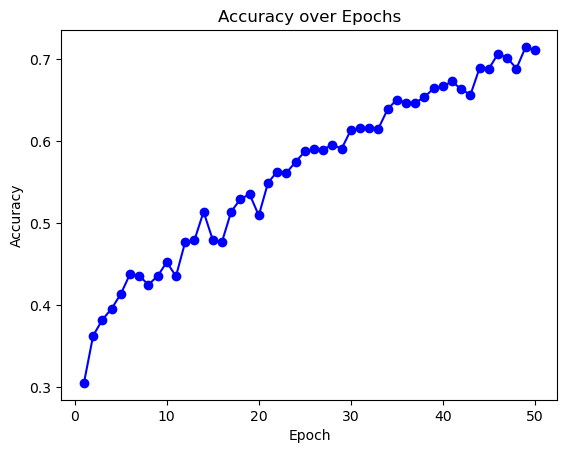

[{0: 705, 1: 325, 2: 123, 3: 198, 4: 213, 5: 341, 6: 356, 7: 374, 8: 112, 9: 302}, {0: 352, 1: 482, 2: 185, 3: 453, 4: 135, 5: 237, 6: 442, 7: 360, 8: 427, 9: 553}, {0: 527, 1: 590, 2: 267, 3: 193, 4: 394, 5: 286, 6: 385, 7: 337, 8: 454, 9: 387}, {0: 459, 1: 406, 2: 210, 3: 133, 4: 261, 5: 335, 6: 529, 7: 328, 8: 640, 9: 654}, {0: 314, 1: 449, 2: 198, 3: 259, 4: 193, 5: 320, 6: 734, 7: 514, 8: 552, 9: 601}, {0: 469, 1: 563, 2: 357, 3: 412, 4: 301, 5: 213, 6: 459, 7: 445, 8: 568, 9: 589}, {0: 576, 1: 554, 2: 285, 3: 437, 4: 317, 5: 256, 6: 469, 7: 396, 8: 561, 9: 507}, {0: 259, 1: 433, 2: 286, 3: 257, 4: 428, 5: 454, 6: 408, 7: 560, 8: 385, 9: 778}, {0: 370, 1: 570, 2: 160, 3: 252, 4: 322, 5: 335, 6: 564, 7: 495, 8: 790, 9: 495}, {0: 473, 1: 410, 2: 502, 3: 263, 4: 305, 5: 433, 6: 512, 7: 447, 8: 591, 9: 587}, {0: 363, 1: 761, 2: 255, 3: 343, 4: 280, 5: 424, 6: 532, 7: 457, 8: 359, 9: 577}, {0: 593, 1: 627, 2: 150, 3: 241, 4: 419, 5: 476, 6: 513, 7: 633, 8: 590, 9: 527}, {0: 519, 1: 737

In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

def mean_squared_error_loss(y_predict, y_true):
    """
    平方损失函数
    :param y_predict: 预测值, shape (N, d)，N为批量样本数
    :param y_true: 真实值, shape (N, d)
    :return: (loss, dy) - 损失值和梯度
    """
    # 计算损失
    loss = np.mean(np.sum((y_predict - y_true) ** 2, axis=-1))  # 损失函数

    # 计算梯度
    dy = 2 * (y_predict - y_true) / y_predict.shape[0]  # 梯度
    return loss, dy

def relu_backward(next_dz, z):
    """
    relu反向传播
    :param next_dz: 激活后的梯度
    :param z: 激活前的值
    :return:
    """
    dz = np.where(np.greater(z, 0), next_dz, 0)
    return dz

# 定义后向过程
def backward(X, y_true):
    loss, dy = mean_squared_error_loss(nuerons3["y"], y_true)
    gradients3["W3"], gradients3["b3"], gradients3["z3_relu"] = fc_backward(dy, weights3["W3"], nuerons3["z3_relu"])
    gradients3["z3"] = relu_backward(gradients3["z3_relu"], nuerons3["z3"])
    gradients3["W2"], gradients3["b2"], gradients3["z2_relu"] = fc_backward(gradients3["z3"], weights3["W2"], nuerons3["z2_relu"])
    gradients3["z2"] = relu_backward(gradients3["z2_relu"], nuerons3["z2"])
    gradients3["W1"], gradients3["b1"], _ = fc_backward(gradients3["z2"], weights3["W1"], X)
    return loss

# 定义权重、神经元、梯度
def relu_forward(z):
    """
    relu前向传播
    :param z: 待激活层
    :return: 激活后的结果
    """
    return np.maximum(0, z)

weights3 = {}
weights_scale = 1e-3
weights3["W1"] = weights_scale * np.random.randn(1024, 512)
weights3["b1"] = np.zeros(512)
weights3["W2"] = weights_scale * np.random.randn(512, 256)
weights3["b2"] = np.zeros(256)
weights3["W3"] = weights_scale * np.random.randn(256, 10)
weights3["b3"] = np.zeros(10)

accuracy_for_class = []
nuerons3 = {}
gradients3 = {}

# 定义前向过程
def forward(X):
    nuerons3["z2"] = fc_forward(X, weights3["W1"], weights3["b1"])
    nuerons3["z2_relu"] = relu_forward(nuerons3["z2"])
    nuerons3["z3"] = fc_forward(nuerons3["z2_relu"], weights3["W2"], weights3["b2"])
    nuerons3["z3_relu"] = relu_forward(nuerons3["z3"])
    nuerons3["y"] = fc_forward(nuerons3["z3_relu"], weights3["W3"], weights3["b3"])
    return nuerons3["y"]

def fc_backward(next_dz, W, z):
    """
    全连接层的反向传播
    :param next_dz: 下一层的梯度
    :param W: 当前层的权重
    :param z: 当前层的输出
    :return:
    """
    N = z.shape[0]
    dz = np.dot(next_dz, W.T)  # 当前层的梯度
    dw = np.dot(z.T, next_dz)  # 当前层权重的梯度
    db = np.sum(next_dz, axis=0)  # 当前层偏置的梯度, N个样本的梯度求和
    return dw / N, db / N, dz

def fc_forward(z, W, b):
    """
    全连接层的前向传播
    :param z: 当前层的输出,形状 (N,ln)
    :param W: 当前层的权重
    :param b: 当前层的偏置
    :return: 下一层的输出
    """
    return np.dot(z, W) + b

# 初始化变量
Losslist = []
batch_size = 32
epoch = 50
steps = train_num // batch_size
lr = 0.1
loss = 0
losssum = 0
accuracy_list = []

for e in range(epoch):
    for s in range(steps):
        X, y = next_batch(batch_size)
        split_data = np.split(X, 3, axis=1)

        # split_data 是一个包含三个数组的列表，每个数组的形状为 (50000, 1024)
        part1, part2, part3 = split_data
        
        # 前向过程
        forward(part3)
        loss = backward(part3, y)
        losssum += loss
        
        # 更新梯度
        for k in ["W1", "b1", "W2", "b2", "W3", "b3"]:
            weights3[k] -= lr * gradients3[k]
    
    Losslist.append(losssum / steps)
    losssum = 0
    count = 0
    accuracy = {i: 0 for i in range(10)}
    
    for i in range(10000):
        x, y = train_set[0][i], train_y[i]
        x = x[2048:3072]
        y_predict = np.argmax(forward([x])[0])
        if np.argmax(y) == y_predict:
            count += 1
            if np.argmax(y) in accuracy:
                accuracy[np.argmax(y)] += 1
        
    accuracy_for_class.append(accuracy)
    accuracy_list.append(count / 10000)
    print("epoch", e)

# 横坐标是索引 + 1 (即epoch数)
epochs = list(range(1, len(accuracy_list) + 1))

# 绘制图表
plt.plot(epochs, accuracy_list, marker='o', linestyle='-', color='b')

# 添加标题和标签
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 显示图表
plt.show()

print(accuracy_for_class)
print(Losslist)

自创模型，学习机3

In [22]:
def forward1(X):
    nuerons["z2"]=fc_forward(X,weights["W1"],weights["b1"])
    nuerons["z2_relu"]=relu_forward(nuerons["z2"])
    nuerons["z3"]=fc_forward(nuerons["z2_relu"],weights["W2"],weights["b2"])
    nuerons["z3_relu"]=relu_forward(nuerons["z3"])
    nuerons["y"]=fc_forward(nuerons["z3_relu"],weights["W3"],weights["b3"])
    return nuerons["y"]
def forward2(X):
    nuerons2["z2"] = fc_forward(X, weights2["W1"], weights2["b1"])
    nuerons2["z2_relu"] = relu_forward(nuerons2["z2"])
    nuerons2["z3"] = fc_forward(nuerons2["z2_relu"], weights2["W2"], weights2["b2"])
    nuerons2["z3_relu"] = relu_forward(nuerons2["z3"])
    nuerons2["y"] = fc_forward(nuerons2["z3_relu"], weights2["W3"], weights2["b3"])
    return nuerons2["y"]
def forward3(X):
    nuerons3["z2"] = fc_forward(X, weights3["W1"], weights3["b1"])
    nuerons3["z2_relu"] = relu_forward(nuerons3["z2"])
    nuerons3["z3"] = fc_forward(nuerons3["z2_relu"], weights3["W2"], weights3["b2"])
    nuerons3["z3_relu"] = relu_forward(nuerons3["z3"])
    nuerons3["y"] = fc_forward(nuerons3["z3_relu"], weights3["W3"], weights3["b3"])
    return nuerons3["y"]
accuracy_for_class = []
wrong_for_class = []
accuracy_list = []
accuracy = {i: 0 for i in range(10)}
wrong = {i: 0 for i in range(10)}
count = 0
for i in range(5000):
    x, y = test_set[0][i], test_y[i]
    x1 = x[:1024]
    x2 = x[1024:2048]
    x3 = x[2048:3072]
    y_predict = np.argmax(forward1([x1])[0])
    if np.argmax(y) == y_predict:
        count += 1
        if np.argmax(y) in accuracy:
            accuracy[np.argmax(y)] += 1
    else:
        wrong[np.argmax(y)] += 1
accuracy_for_class.append(accuracy)
wrong_for_class.append(wrong)
accuracy_list.append(count / 5000)
accuracy = {i: 0 for i in range(10)}
wrong = {i: 0 for i in range(10)}
count = 0
for i in range(5000):
    x, y = test_set[0][i], test_y[i]
    x1 = x[:1024]
    x2 = x[1024:2048]
    x3 = x[2048:3072]
    y_predict = np.argmax(forward1([x2])[0])
    if np.argmax(y) == y_predict:
        count += 1
        if np.argmax(y) in accuracy:
            accuracy[np.argmax(y)] += 1
    else:
        wrong[np.argmax(y)] += 1
accuracy_for_class.append(accuracy)
wrong_for_class.append(wrong)
accuracy_list.append(count / 5000)
accuracy = {i: 0 for i in range(10)}
wrong = {i: 0 for i in range(10)}
count = 0
for i in range(5000):
    x, y = test_set[0][i], test_y[i]
    x1 = x[:1024]
    x2 = x[1024:2048]
    x3 = x[2048:3072]
    y_predict = np.argmax(forward1([x3])[0])
    if np.argmax(y) == y_predict:
        count += 1
        if np.argmax(y) in accuracy:
            accuracy[np.argmax(y)] += 1
    else:
        wrong[np.argmax(y)] += 1
accuracy_for_class.append(accuracy)
wrong_for_class.append(wrong)
accuracy_list.append(count / 5000)
print(accuracy_for_class)
print(wrong_for_class)
print(accuracy_list)

[{0: 188, 1: 335, 2: 206, 3: 145, 4: 158, 5: 162, 6: 194, 7: 246, 8: 267, 9: 266}, {0: 194, 1: 304, 2: 212, 3: 139, 4: 138, 5: 157, 6: 183, 7: 271, 8: 251, 9: 271}, {0: 184, 1: 297, 2: 189, 3: 146, 4: 140, 5: 146, 6: 141, 7: 219, 8: 246, 9: 290}]
[{0: 300, 1: 170, 2: 306, 3: 352, 4: 349, 5: 326, 6: 297, 7: 249, 8: 237, 9: 247}, {0: 294, 1: 201, 2: 300, 3: 358, 4: 369, 5: 331, 6: 308, 7: 224, 8: 253, 9: 242}, {0: 304, 1: 208, 2: 323, 3: 351, 4: 367, 5: 342, 6: 350, 7: 276, 8: 258, 9: 223}]
[0.4334, 0.424, 0.3996]


In [23]:
import numpy as np

# 准确预测的个数
accuracy_for_class = [
    {0: 188, 1: 335, 2: 206, 3: 145, 4: 158, 5: 162, 6: 194, 7: 246, 8: 267, 9: 266},
    {0: 194, 1: 304, 2: 212, 3: 139, 4: 138, 5: 157, 6: 183, 7: 271, 8: 251, 9: 271},
    {0: 184, 1: 297, 2: 189, 3: 146, 4: 140, 5: 146, 6: 141, 7: 219, 8: 246, 9: 290}
]

# 错误预测的个数
wrong_for_class = [
    {0: 300, 1: 170, 2: 306, 3: 352, 4: 349, 5: 326, 6: 297, 7: 249, 8: 237, 9: 247},
    {0: 294, 1: 201, 2: 300, 3: 358, 4: 369, 5: 331, 6: 308, 7: 224, 8: 253, 9: 242},
    {0: 304, 1: 208, 2: 323, 3: 351, 4: 367, 5: 342, 6: 350, 7: 276, 8: 258, 9: 223}
]

# 计算 F1 分数
f1_scores = []
for i in range(3):  # 针对三个模型
    f1_per_model = {}
    for class_id in range(10):  # 针对 10 个类别
        tp = accuracy_for_class[i][class_id]  # 正确预测的个数
        fp = wrong_for_class[i][class_id]  # 错误预测的个数
        fn = fp  # 实际上，错误预测数就等于假负例数（FN）

        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0

        if precision + recall != 0:
            f1 = 2 * (precision * recall) / (precision + recall)
        else:
            f1 = 0  # 如果 precision 和 recall 都为 0，F1 分数设为 0

        f1_per_model[class_id] = f1
    
    f1_scores.append(f1_per_model)

# 打印 F1 分数
for i, f1_score in enumerate(f1_scores):
    print(f"Model {i + 1} F1 Scores:")
    for class_id, f1 in f1_score.items():
        print(f"Class {class_id}: {f1:.4f}")

Model 1 F1 Scores:
Class 0: 0.3852
Class 1: 0.6634
Class 2: 0.4023
Class 3: 0.2918
Class 4: 0.3116
Class 5: 0.3320
Class 6: 0.3951
Class 7: 0.4970
Class 8: 0.5298
Class 9: 0.5185
Model 2 F1 Scores:
Class 0: 0.3975
Class 1: 0.6020
Class 2: 0.4141
Class 3: 0.2797
Class 4: 0.2722
Class 5: 0.3217
Class 6: 0.3727
Class 7: 0.5475
Class 8: 0.4980
Class 9: 0.5283
Model 3 F1 Scores:
Class 0: 0.3770
Class 1: 0.5881
Class 2: 0.3691
Class 3: 0.2938
Class 4: 0.2761
Class 5: 0.2992
Class 6: 0.2872
Class 7: 0.4424
Class 8: 0.4881
Class 9: 0.5653


In [28]:
def forward1(X):
    nuerons["z2"] = fc_forward(X, weights["W1"], weights["b1"])
    nuerons["z2_relu"] = relu_forward(nuerons["z2"])
    nuerons["z3"] = fc_forward(nuerons["z2_relu"], weights["W2"], weights["b2"])
    nuerons["z3_relu"] = relu_forward(nuerons["z3"])
    nuerons["y"] = fc_forward(nuerons["z3_relu"], weights["W3"], weights["b3"])
    return nuerons["y"]

def forward2(X):
    nuerons2["z2"] = fc_forward(X, weights2["W1"], weights2["b1"])
    nuerons2["z2_relu"] = relu_forward(nuerons2["z2"])
    nuerons2["z3"] = fc_forward(nuerons2["z2_relu"], weights2["W2"], weights2["b2"])
    nuerons2["z3_relu"] = relu_forward(nuerons2["z3"])
    nuerons2["y"] = fc_forward(nuerons2["z3_relu"], weights2["W3"], weights2["b3"])
    return nuerons2["y"]

def forward3(X):
    nuerons3["z2"] = fc_forward(X, weights3["W1"], weights3["b1"])
    nuerons3["z2_relu"] = relu_forward(nuerons3["z2"])
    nuerons3["z3"] = fc_forward(nuerons3["z2_relu"], weights3["W2"], weights3["b2"])
    nuerons3["z3_relu"] = relu_forward(nuerons3["z3"])
    nuerons3["y"] = fc_forward(nuerons3["z3_relu"], weights3["W3"], weights3["b3"])
    return nuerons3["y"]

accuracy_list = [
    {0: 188, 1: 335, 2: 206, 3: 145, 4: 158, 5: 162, 6: 194, 7: 246, 8: 267, 9: 266},
    {0: 194, 1: 304, 2: 212, 3: 139, 4: 138, 5: 157, 6: 183, 7: 271, 8: 251, 9: 271},
    {0: 184, 1: 297, 2: 189, 3: 146, 4: 140, 5: 146, 6: 141, 7: 219, 8: 246, 9: 290}
]

# 将准确率转换为浮点数，并计算每个类别的准确率
total_samples = 1000  # 每个类别的样本数
accuracy_rates = [np.array([value / total_samples for value in acc_dict.values()]) for acc_dict in accuracy_list]

accuracy = {i: 0 for i in range(10)}
wrong = {i: 0 for i in range(10)}
count = 0

def weighted_voting(x1, x2, x3):
    # 前向传播计算每个模型的输出
    output1 = forward1([x1])[0]  
    output2 = forward2([x2])[0]
    output3 = forward3([x3])[0]

    # 使用模型的准确率作为权重
    weight1, weight2, weight3 = accuracy_rates

    # 加权求和
    weighted_output = (weight1 * output1 + weight2 * output2 + weight3 * output3)

    # 返回加权和后预测的类别
    return np.argmax(weighted_output)

# 测试加权投票
for i in range(5000):
    x, y = test_set[0][i+5000], test_y[i+5000]
    x1 = x[:1024]
    x2 = x[1024:2048]
    x3 = x[2048:3072]

    # 加权投票预测
    y_predict = weighted_voting(x1, x2, x3)

    if np.argmax(y) == y_predict:
        count += 1
        if np.argmax(y) in accuracy:
            accuracy[np.argmax(y)] += 1
    else:
        wrong[np.argmax(y)] += 1

print(accuracy)
print(wrong)
print(count/5000)

{0: 257, 1: 366, 2: 245, 3: 126, 4: 98, 5: 190, 6: 239, 7: 321, 8: 309, 9: 271}
{0: 255, 1: 129, 2: 243, 3: 377, 4: 395, 5: 322, 6: 270, 7: 184, 8: 187, 9: 216}
0.4844


这个就是自创的缝合模型。

step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500
epoch 0
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500
epoch 1
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500
epoch 2
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500
epoch 3
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500
epoch 4
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500
epoch 5
step 0
step 100
step 200
step 300
step 400
step 500
step 600
ste

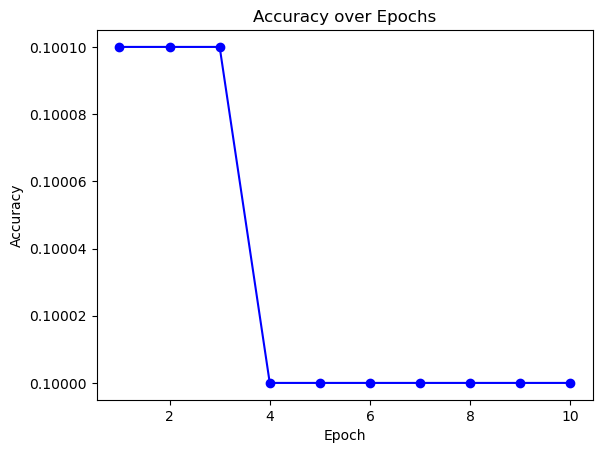

In [32]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
import os
import tarfile
import pickle
import platform
import numpy as np
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict



def next_batch(batch_size):
    idx=np.random.choice(train_num,batch_size)
    return train_set[0][idx],train_y[idx]
def mean_squared_error_loss(y_predict, y_true):
    """
    平方损失函数
    :param y_predict: 预测值, shape (N, d)，N为批量样本数
    :param y_true: 真实值, shape (N, d)
    :return: (loss, dy) - 损失值和梯度
    """
    # 计算损失
    loss = np.mean(np.sum((y_predict - y_true) ** 2, axis=-1))  # 损失函数

    # 计算梯度
    dy = 2 * (y_predict - y_true) / y_predict.shape[0]  # 梯度
    return loss, dy


def relu_backward(next_dz, z):
    """
    relu反向传播
    :param next_dz: 激活后的梯度
    :param z: 激活前的值
    :return:
    """
    dz = np.where(np.greater(z, 0), next_dz, 0)
    return dz


# 定义后向过程
def backward(X, y_true):
    loss, dy = mean_squared_error_loss(nuerons["y"], y_true)
    gradients["W3"], gradients["b3"], gradients["z3_relu"] = fc_backward(dy, weights["W3"], nuerons["z3_relu"])
    gradients["z3"] = relu_backward(gradients["z3_relu"], nuerons["z3"])
    gradients["W2"], gradients["b2"], gradients["z2_relu"] = fc_backward(gradients["z3"],
                                                                         weights["W2"], nuerons["z2_relu"])
    gradients["z2"] = relu_backward(gradients["z2_relu"], nuerons["z2"])
    gradients["W1"], gradients["b1"], _ = fc_backward(gradients["z2"],
                                                      weights["W1"], X)
    return loss


# 定义权重、神经元、梯度
def relu_forward(z):
    """
    relu前向传播
    :param z: 待激活层
    :return: 激活后的结果
    """

    return np.maximum(0, z)


weights = {}
weights_scale = 1e-3
weights["W1"] = weights_scale * np.random.randn(3072, 256)
weights["b1"] = np.zeros(256)
weights["W2"] = weights_scale * np.random.randn(256, 256)
weights["b2"] = np.zeros(256)
weights["W3"] = weights_scale * np.random.randn(256, 10)
weights["b3"] = np.zeros(10)
accuracy_for_class = []
nuerons = {}
gradients = {}


# 定义前向过程
def forward(X):
    nuerons["z2"] = fc_forward(X, weights["W1"], weights["b1"])
    nuerons["z2_relu"] = relu_forward(nuerons["z2"])
    nuerons["z3"] = fc_forward(nuerons["z2_relu"], weights["W2"], weights["b2"])
    nuerons["z3_relu"] = relu_forward(nuerons["z3"])
    nuerons["y"] = fc_forward(nuerons["z3_relu"], weights["W3"], weights["b3"])
    return nuerons["y"]


def fc_backward(next_dz, W, z):
    """
    全连接层的反向传播
    :param next_dz: 下一层的梯度
    :param W: 当前层的权重
    :param z: 当前层的输出
    :return:
    """

    N = z.shape[0]
    dz = np.dot(next_dz, W.T)  # 当前层的梯度
    dw = np.dot(z.T, next_dz)  # 当前层权重的梯度
    db = np.sum(next_dz, axis=0)  # 当前层偏置的梯度, N个样本的梯度求和
    return dw / N, db / N, dz


def fc_forward(z, W, b):
    """
    全连接层的前向传播
    :param z: 当前层的输出,形状 (N,ln)
    :param W: 当前层的权重
    :param b: 当前层的偏置
    :return: 下一层的输出
    """

    return np.dot(z, W) + b

# 初始化变量
Losslist = []
batch_size = 32
epoch = 10
steps = train_num // batch_size
lr = 0.1
loss = 0
losssum = 0
accuracy_list = []
# 定义Adam相关的参数
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8


# 初始化一阶动量和二阶动量
m = {k: np.zeros_like(weights[k]) for k in weights}
v = {k: np.zeros_like(weights[k]) for k in weights}
t = 0  # 时间步数


def adam_update(weights, gradients, t, lr, beta1, beta2, epsilon):
    for k in weights.keys():
        # 更新一阶和二阶动量
        m[k] = beta1 * m[k] + (1 - beta1) * gradients[k]
        v[k] = beta2 * v[k] + (1 - beta2) * (gradients[k] ** 2)

        # 计算偏差修正后的动量
        m_hat = m[k] / (1 - beta1 ** t)
        v_hat = v[k] / (1 - beta2 ** t)

        # 更新权重
        weights[k] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)


for e in range(epoch):
    for s in range(steps):
        X, y = next_batch(batch_size)

        # 前向过程
        forward(X)
        loss = backward(X, y)
        losssum += loss

        # 更新梯度（使用 Adam）
        t += 1
        adam_update(weights, gradients, t, lr, beta1, beta2, epsilon)

        if s % 100 == 0:
            print("step", s)

    Losslist.append(losssum / steps)
    losssum = 0
    count = 0
    accuracy = {i: 0 for i in range(10)}

    for i in range(10000):
        x, y = test_set[0][i], test_y[i]
        y_predict = np.argmax(forward([x])[0])
        if np.argmax(y) == y_predict:
            count += 1
            if np.argmax(y) in accuracy:
                accuracy[np.argmax(y)] += 1

    accuracy_for_class.append(accuracy)
    accuracy_list.append(count / 10000)
    print("epoch", e)
# 横坐标是索引 + 1 (即epoch数)
epochs = list(range(1, len(accuracy_list) + 1))

# 绘制图表
plt.plot(epochs, accuracy_list, marker='o', linestyle='-', color='b')

# 添加标题和标签
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# 显示图表
plt.show()

单Adam

step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500
epoch 0
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500
epoch 1
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500
epoch 2
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500
epoch 3
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500
epoch 4
step 0
step 100
step 200
step 300
step 400
step 500
step 600
step 700
step 800
step 900
step 1000
step 1100
step 1200
step 1300
step 1400
step 1500
epoch 5
step 0
step 100
step 200
step 300
step 400
step 500
step 600
ste

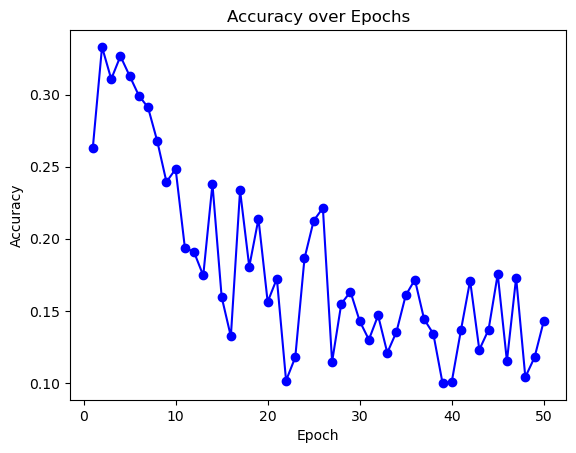

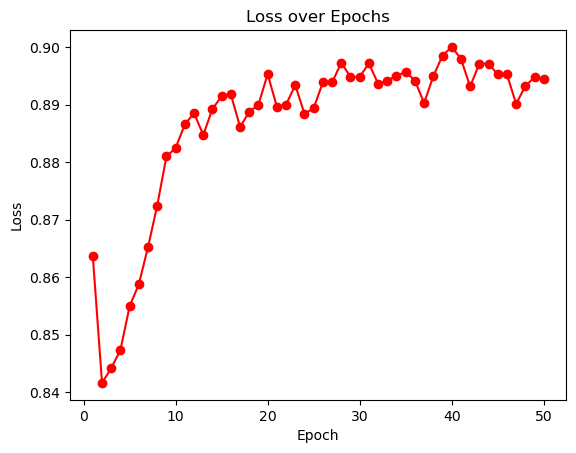

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

def relu_forward(z):
    
    """
    relu前向传播
    :param z: 待激活层
    :return: 激活后的结果
    """
    
    return np.maximum(0, z)


def mean_squared_error_loss(y_predict, y_true):
    loss = np.mean(np.sum((y_predict - y_true) ** 2, axis=-1))
    dy = 2 * (y_predict - y_true) / y_predict.shape[0]
    return loss, dy

def relu_backward(next_dz, z):
    dz = np.where(np.greater(z, 0), next_dz, 0)
    return dz

def dropout_forward(z, dropout_rate):
    mask = (np.random.rand(*z.shape) > dropout_rate).astype(np.float32)
    return z * mask, mask

def dropout_backward(dz, mask):
    return dz * mask

def backward(X, y_true):
    loss, dy = mean_squared_error_loss(nuerons["y"], y_true)
    gradients["W3"], gradients["b3"], gradients["z3_relu"] = fc_backward(dy, weights["W3"], nuerons["z3_relu"])
    
    gradients["z3"] = relu_backward(gradients["z3_relu"], nuerons["z3"])
    gradients["z3"] = dropout_backward(gradients["z3"], nuerons["dropout_mask_3"])
    
    gradients["W2"], gradients["b2"], gradients["z2_relu"] = fc_backward(gradients["z3"], weights["W2"], nuerons["z2_relu"])
    
    gradients["z2"] = relu_backward(gradients["z2_relu"], nuerons["z2"])
    gradients["z2"] = dropout_backward(gradients["z2"], nuerons["dropout_mask_2"])
    
    gradients["W1"], gradients["b1"], _ = fc_backward(gradients["z2"], weights["W1"], X)
    return loss

weights = {}
weights_scale = 1e-3
weights["W1"] = weights_scale * np.random.randn(3072, 256)
weights["b1"] = np.zeros(256)
weights["W2"] = weights_scale * np.random.randn(256, 256)
weights["b2"] = np.zeros(256)
weights["W3"] = weights_scale * np.random.randn(256, 10)
weights["b3"] = np.zeros(10)

accuracy_for_class = []
nuerons = {}
gradients = {}

def forward(X, dropout_rate=0.5):
    nuerons["z2"] = fc_forward(X, weights["W1"], weights["b1"])
    nuerons["z2_relu"] = relu_forward(nuerons["z2"])
    
    nuerons["z2_dropout"], nuerons["dropout_mask_2"] = dropout_forward(nuerons["z2_relu"], dropout_rate)
    
    nuerons["z3"] = fc_forward(nuerons["z2_dropout"], weights["W2"], weights["b2"])
    nuerons["z3_relu"] = relu_forward(nuerons["z3"])
    
    nuerons["z3_dropout"], nuerons["dropout_mask_3"] = dropout_forward(nuerons["z3_relu"], dropout_rate)
    
    nuerons["y"] = fc_forward(nuerons["z3_dropout"], weights["W3"], weights["b3"])
    return nuerons["y"]

def fc_backward(next_dz, W, z):
    N = z.shape[0]
    dz = np.dot(next_dz, W.T)
    dw = np.dot(z.T, next_dz)
    db = np.sum(next_dz, axis=0)
    return dw / N, db / N, dz

def fc_forward(z, W, b):
    return np.dot(z, W) + b

# 初始化变量
loss_list = []  # 用于存储每个epoch的损失
batch_size = 32
epoch = 50
steps = train_num // batch_size
lr = 0.1
losssum = 0
accuracy_list = []

for e in range(epoch):
    for s in range(steps):
        X, y = next_batch(batch_size)
        
        # 前向过程
        forward(X)
        loss = backward(X, y)
        losssum += loss
        
        # 更新梯度
        for k in ["W1", "b1", "W2", "b2", "W3", "b3"]:
            weights[k] -= lr * gradients[k]
        
        if s % 100 == 0:
            print("step", s)
    
    avg_loss = losssum / steps
    loss_list.append(avg_loss)  # 记录平均损失
    losssum = 0
    count = 0
    accuracy = {i: 0 for i in range(10)}
    
    for i in range(10000):
        x, y = test_set[0][i], test_y[i]
        y_predict = np.argmax(forward([x], dropout_rate=0.0)[0])
        if np.argmax(y) == y_predict:
            count += 1
            if np.argmax(y) in accuracy:
                accuracy[np.argmax(y)] += 1
    accuracy_for_class.append(accuracy)
    accuracy_list.append(count / 10000)
    print("epoch", e)

# 绘制准确率图
epochs = list(range(1, len(accuracy_list) + 1))
plt.plot(epochs, accuracy_list, marker='o', linestyle='-', color='b')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# 绘制损失图
plt.plot(range(1, epoch + 1), loss_list, marker='o', linestyle='-', color='r')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Dropout